Import

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon
import matplotlib.font_manager as fm
from IPython.display import Image
from PIL import Image
import warnings
warnings.filterwarnings("ignore")
font_dirs = ["C:/Users/vdeny/personal/fonts"]
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    fm.fontManager.addfont(font_file)
plt.rcParams['font.family'] = 'Liberation Serif'

Data

In [99]:
T5_O = pd.read_csv('T524_Outfield.csv', index_col=0)
T5_K = pd.read_csv('T524_Keeper.csv', index_col=0)
T5_F = pd.read_csv('T524_For_teams.csv', index_col=0)
T5_V = pd.read_csv('T524_Vs_teams.csv', index_col=0)


colors = {
    #Premier-League
    'Arsenal': ['Premier-League', 'red', '#EF0A04', 'yellow', 'E0F830'],
    'Aston Villa': ['Premier-League', 'red', '#681028', 'blue', '#94BEE6'],
    'Bournemouth': ['Premier-League', 'red', '#B3282D', 'blue', '#B0D0E8'],
    'Brentford': ['Premier-League', 'red', '#E4010C', 'blue', '#98D0F0'],
    'Brighton': ['Premier-League', 'blue', '#005DAB', 'red', '#F04050'],
    'Burnley': ['Premier-League', 'red', '#5F013F', 'yellow', '#E0E070'],
    'Chelsea': ['Premier-League', 'blue', '#010A8F', 'yellow', '#E2D332'],
    'Crystal Palace': ['Premier-League', 'blue', '#0053AC', 'black', '#202020'],
    'Everton': ['Premier-League', 'blue', '#00009E', 'red', '#F85850'],
    'Fulham': ['Premier-League', 'black', '#202020', 'red', '#E82870'],
    'Liverpool': ['Premier-League', 'red', '#B81820', 'blue', '#7868C0'],
    'Luton Town': ['Premier-League', 'red', '#E83828', 'blue', '#281838'],
    'Manchester City': ['Premier-League', 'blue', '#69AADD', 'red', '#AC242E'],
    'Manchester Utd': ['Premier-League', 'red', '#C80818', 'green', '#005028'],
    'Newcastle Utd': ['Premier-League', 'black', '#080808', 'green', '#008860'],
    "Nott'ham Forest": ['Premier-League', 'red', '#DE0000', 'blue', '#202850'],
    'Sheffield Utd': ['Premier-League', 'red', '#ED1C22', 'yellow', '#F8C830'],
    'Tottenham': ['Premier-League', 'blue', '#0C1C57', 'red', '#D72050'],
    'West Ham': ['Premier-League', 'red', '#7C2838', 'blue', '#104078'],
    'Wolves': ['Premier-League', 'yellow', '#FDBA0B', 'red', '#C81820'],
    #La-Liga
    'Alavés': ['La-Liga', 'blue', '#002DA0', 'green', '#005038'],
    'Almería': ['La-Liga', 'red', '#E30409', 'blue', '#027BC2'],
    'Athletic Club': ['La-Liga', 'red', '#EE211E', 'blue', '#60C0D8'],
    'Atlético Madrid': ['La-Liga', 'red', '#E90D17', 'blue', '#0030D8'],
    'Barcelona': ['La-Liga', 'red', '#A40144', 'blue', '#004C98'],
    'Betis': ['La-Liga', 'green', '#03954E', 'black', '#404040'],
    'Cádiz': ['La-Liga', 'yellow', '#FDE602', 'blue', '#0046A2'],
    'Celta Vigo': ['La-Liga', 'blue', '#8AC5EF', 'red', '#E5204D'],
    'Getafe': ['La-Liga', 'blue', '#003890', 'red', '#B81040'],
    'Girona': ['La-Liga', 'red', '#D00425', 'yellow', '#F7B614'],
    'Granada': ['La-Liga', 'red', '#F7B614', 'blue', '#283880'],
    'Las Palmas': ['La-Liga', 'yellow', '#FFE208', 'blue', '#004A9B'],
    'Mallorca': ['La-Liga', 'red', '#EC141F', 'yellow', '#FFF315'],
    'Osasuna': ['La-Liga', 'red', '#D8061F', 'blue', '#01004C'],
    'Rayo Vallecano': ['La-Liga', 'red', '#E43214', 'yellow', '#BFB12A'],
    'Real Madrid': ['La-Liga', 'yellow', '#FBC000', 'blue', '#024697'],
    'Real Sociedad': ['La-Liga', 'blue', '#0A3A8F', 'yellow', '#E7A511'],
    'Sevilla': ['La-Liga', 'red', '#D4091C', 'black', '#181818'],
    'Valencia': ['La-Liga', 'yellow', '#FFE014', 'red', '#EF3121'],
    'Villarreal': ['La-Liga', 'yellow', '#FDE869', 'red', '#E80000'],
    #Serie-A
    'Atalanta': ['Serie-A', 'blue', '#2B5AB2', 'red', '#C82030'],
    'Bologna': ['Serie-A', 'red', '#A11931', 'blue', '#132436'],
    'Cagliari': ['Serie-A', 'red', '#B00821', 'blue', '#001D3F'],
    'Empoly': ['Serie-A', 'blue', '#0860dD', 'yellow', '#D3A141'],
    'Fiorentina': ['Serie-A', 'blue', '#60328C', 'red', '#E12C23'],
    'Frosinone': ['Serie-A', 'yellow', '#FEDA00', 'blue', '#024095'],
    'Genoa': ['Serie-A', 'red', '#AE1213', 'blue', '#00213F'],
    'Hellas Verona': ['Serie-A', 'blue', '#002C6D', 'yellow', '#FDE31C'],
    'Inter': ['Serie-A',],
    'Juventus': ['Serie-A',],
    'Lazio': ['Serie-A',],
    'Lecce': ['Serie-A',],
    'Milan': ['Serie-A', 'red'],
    'Monza': ['Serie-A',],
    'Napoli': ['Serie-A',],
    'Roma': ['Serie-A',],
    'Salernitana': ['Serie-A',],
    'Sassuolo': ['Serie-A',],
    'Torino': ['Serie-A',],
    'Udinese': ['Serie-A',],
    #Bundesliga
    'Augsburg': ['Bundesliga', 'red', '#BB3733', 'green', '#0F674F'],
    'Bayern Munich': ['Bundesliga', 'red', '#DC052E', 'black', '#292929'],
    'Bochum': ['Bundesliga', 'blue', '#0E65AA', 'red', '#F08070'],
    'Darmstadt 98': ['Bundesliga', 'blue', '#0D59A4', 'red', 'E84808'],
    'Dortmund': ['Bundesliga', 'yellow', '#F8E80F', 'black', '#201F1A'],
    'Eint Frankfurt': ['Bundesliga', 'black', '#262523', 'red', '#ED0D15'],
    'Freiburg': ['Bundesliga', 'black', '#0F0F0F', 'red', '#A00820'],
    'Gladbach': ['Bundesliga', 'black', '#101010', 'green', '#5CA659'],
    'Heidenheim': ['Bundesliga', 'red', '#E40F21', 'blue', '#0C477F'],
    'Hoffenheim': ['Bundesliga', 'blue', '#2565AC', 'yellow', '#E89848'],
    'Köln': ['Bundesliga', 'red', '#E92B2D', 'blue', '#90B0D0'],
    'Leverkusen': ['Bundesliga', 'red', '#FF0F0E', 'black', '#202020'],
    'Mainz 05': ['Bundesliga', 'red', '#E8151E', 'blue', '#082040'],
    'RB Leipzig': ['Bundesliga', 'red', '#E1164D', 'blue', '#0050D0'],
    'Stuttgart': ['Bundesliga', 'red', '#D01B2C', 'green', '#197368'],
    'Union Berlin': ['Bundesliga', 'red', '#EB2830', 'green', '#304840'],
    'Werder Bremen': ['Bundesliga', 'green', '#119C61', 'black', '#282329'],
    'Wolfsburg': ['Bundesliga', 'green', '#10AB0F', 'red', '#E05828']
    }

attributes = {'Goals': ['goals', 1], 
              'xG': ['npxg', 1], 
              'Assists': ['assists', 1], 
              'Shots': ['shots', 1], 
              'Shots%': [['shots_on_target', 'shots'], 0], 
              'xA': ['xg_assist', 1], 
              'Progressive Passes': ['progressive_passes', 1], 
              'Key Passes': ['assisted_shots', 1],
              'Dribbles': ['take_ons', 1],
              'Realisation': [['goals', 'shots_on_target'], 0],
              'Allowed goals': ['gk_goals_against', 1],
              'Opponent xG': ['gk_psxg', 1],
              'Saves': ['gk_saves', 1],
              'Saves%': [['gk_saves', 'gk_shots_on_target_against'], 0],
              'Penalty Saves%': [['gk_pens_saved', 'gk_pens_allowed'], 2],
              'GK Passes': ['gk_passes_completed_launched', 1],
              'GK Passes%': [['gk_passes_completed_launched', 'gk_passes_launched'], 0],
              'Clean Sheets': ['gk_clean_sheets', 3],
              'Tackles': ['tackles', 1],
              'Passes%': [['passes_completed', 'passes'], 0]
              }

lists = {'GK': ['Allowed goals', 'Opponent xG', 'Saves', 'Saves%', 'Penalty Saves%', 'Passes', 'Passes%', 'Clean Sheets'],
         'FW': ['Goals', 'xG', 'Shots', 'Shots%', 'Realisation', 'Assists', 'xA', 'Progressive Passes', 'Key Passes', 'Passes%', 'Dribbles', 'Tackles']}

Metrics

In [100]:
def metrics(df, pos, player=None, team=None):
    df_mask = df.position.map(lambda x: x.find(pos) != -1)
    players = df[df_mask].loc[df['minutes_90s'] > 19]
    if player != None and team != None:
        mask = ((df.player == player) & (df.team == team))
        df_metrics = pd.DataFrame()
        time_90s = df[mask]['minutes_90s']
        for i in lists[pos]:
            if attributes[i][1] == 1:
                df_metrics[i] = round(df[mask][attributes[i][0]] / time_90s, 2)
            elif attributes[i][1] == 0:
                df_metrics[i] = round(df[mask][attributes[i][0][0]] / df[mask][attributes[i][0][1]], 2)
            elif attributes[i][1] == 2:
                df_metrics[i] = round(df[mask][attributes[i][0][0]] / (df[mask][attributes[i][0][0]] + df[mask][attributes[i][0][1]]), 2)
            else:
                df_metrics[i] = df[mask][attributes[i][0]]
        df_metrics = df_metrics.T
        df_metrics.columns = ['Statistic']
        return df_metrics
    else:
        values = []
        dfs = []
        for i in lists[pos]:
            if attributes[i][1] == 1:
                values.append(round((players[attributes[i][0]] / players['minutes_90s']).mean(), 2))
                a = round(players[attributes[i][0]] / players['minutes_90s'], 2)
                dfs.append(a)
            elif attributes[i][1] == 0:
                values.append(round(players[attributes[i][0][0]].sum() / players[attributes[i][0][1]].sum(), 2))
                a = round(players[attributes[i][0][0]] / players[attributes[i][0][1]], 2)
                dfs.append(a)
            elif attributes[i][1] == 2:
                values.append(round(players[attributes[i][0][0]].sum() / (players[attributes[i][0][0]].sum() + players[attributes[i][0][1]].sum()), 2))
                a = round(players[attributes[i][0][0]] / (players[attributes[i][0][0]] + players[attributes[i][0][1]]), 2)
                dfs.append(a)
            else:
                values.append(round(players[attributes[i][0]].mean(), 2))
                a = round(players[attributes[i][0]], 2)
                dfs.append(a)
        return values, dfs
    

def get_perc_by_metric(metric, df):
    players_lower_metric = (df <= metric).sum()
    all_players = df.shape[0]
    perc = round(players_lower_metric/all_players*100)
    return perc


def get_data(player, team, pos):
    if pos == 'GK':
        df = T5_K.copy()
    else:
        df = T5_O.copy()
    df_metrics_ = metrics(df=df, player=player, team=team, pos=pos).reset_index()
    values1, dfs = metrics(df=df, pos=pos)
    for num in range(len(dfs)):
        metric_p_5 = round(np.percentile(dfs[num],5),2)
        metric_p_95 = round(np.percentile(dfs[num],95),2)
        if str(metric_p_5) == 'nan':
            metric_p_5 = round(np.nanpercentile(dfs[num],5),2)
            metric_p_95 = round(np.nanpercentile(dfs[num],95),2)
        metric = df_metrics_.loc[num,'Statistic']
        perc_metric = get_perc_by_metric(metric, dfs[num])
        df_metrics_.loc[num, 'p5'] = [metric_p_5]
        df_metrics_.loc[num, 'p95'] = [metric_p_95]
        df_metrics_.loc[num, 'p_metr'] = [perc_metric]
    ranges = df_metrics_[['p5','p95']].apply(lambda x: (x[0], x[1]), axis=1).values
    if pos == 'GK':
        ranges[0] = (ranges[0][1], ranges[0][0])
    values = []
    values.append(values1)
    values.append(df_metrics_.Statistic.values)
    params = df_metrics_['index']
    return ranges, values, params

Plotting

In [101]:
def get_coordinates(n):
    alpha = 2 * np.pi/n
    alphas = alpha * np.arange(n)
    coord_x = np.cos(alphas)
    coord_y = np.sin(alphas)
    return np.c_[coord_x, coord_y, alphas]


def get_indices_between(range_list, coord_list, value, reverse):
    idx_1, idx_2 = get_index(array=range_list, value=value, reverse=reverse)
    x_coord = get_vertex_coord(
        old_value=value,
        old_min=range_list[idx_1],
        old_max=range_list[idx_2],
        new_min=coord_list[idx_1, 0],
        new_max=coord_list[idx_2, 0]
    )
    y_coord = get_vertex_coord(
        old_value=value,
        old_min=range_list[idx_1],
        old_max=range_list[idx_2],
        new_min=coord_list[idx_1, 1],
        new_max=coord_list[idx_2, 1]
    )
    return x_coord, y_coord


def get_index(array, value, reverse):
    if reverse == True:
        for i in range(0, len(array) - 1):
            if array[i] >= value >= array[i+1]:
                return i, i+1
    for i in range(0, len(array) - 1):
        if array[i] <= value <= array[i+1]:
            return i, i+1
        

def get_vertex_coord(old_value, old_min, old_max, new_min, new_max):
    new_value = ( (old_value - old_min) / (old_max - old_min) ) * (new_max - new_min) + new_min
    return new_value


def add_image(image, fig, left, bottom, width=None, height=None, **kwargs):
    image = Image.open(image)
    shape = np.array(image).shape
    image_height, image_width =  shape[0], shape[1]
    image_aspect = image_width / image_height
    figsize = fig.get_size_inches()
    fig_aspect = figsize[0] / figsize[1]
    if height is None:
        height = width / image_aspect * fig_aspect
    if width is None:
        width = height*image_aspect/fig_aspect
    ax_image = fig.add_axes((left, bottom, width, height))
    ax_image.axis('off')
    ax_image.imshow(image, **kwargs)
    return fig


def add_labels(params, ax, return_list=False, radius=19, range_val=False):
    coord = get_coordinates(len(params))
    if return_list == True:
        x_y = []
    for i in range(len(params)):
        rot = coord[i, 2]
        x, y = (radius*np.sin(rot), radius*np.cos(rot))
        if return_list == True:
            tup_temp = (x, y)
            x_y.append(tup_temp)
        if y < 0:
            rot += np.pi
        if type(params[i]) == np.float64:
            p = round(params[i], 2)
        else:
            p = params[i]
        if range_val == True:
            size = 26
            color = '#000000'
        else:
            size = 40
            color = '#000000'
        ax.text(x, y, p, rotation=-np.rad2deg(rot), ha='center', va='center', 
                    fontsize=size, fontfamily="Liberation Serif", fontdict=dict(color=color))
    if return_list == True:
        return ax, x_y
    else:
        return ax


def add_ranges(ranges, ax):
    radius = [2.5, 4.1, 5.8, 7.5, 9.2, 10.9, 12.6, 14.3, 15.9, 17.6]
    x_y = []
    range_values = np.array([])
    for rng in ranges:
        value = np.linspace(start=rng[0], stop=rng[1], num=10)
        range_values = np.append(range_values, value)
    range_values = range_values.reshape((len(ranges),10))
    for i in range(len(radius)):
        params = range_values[:, i]
        ax, xy = add_labels(params=params, ax=ax, return_list=True, radius=radius[i], range_val=True)
        x_y.append(xy)
    return ax, np.array(x_y), range_values


def get_vertices(values, xy, range_values):
    vertices = []
    for i in range(len(range_values)):
        range_list = range_values[i, :]
        coord_list = xy[:, i]
        if range_list[0] > range_list[-1]:
            if values[i] >= range_list[0]:
                x_coord, y_coord = coord_list[0, 0], coord_list[0, 1]
            elif values[i] <= range_list[-1]:
                x_coord, y_coord = coord_list[-1, 0], coord_list[-1, 1]
            else:
                x_coord, y_coord = get_indices_between(range_list=range_list, coord_list=coord_list, value=values[i], reverse=True)
        else:
            if values[i] >= range_list[-1]:
                x_coord, y_coord = coord_list[-1, 0], coord_list[-1, 1]
            elif values[i] <= range_list[0]:
                x_coord, y_coord = coord_list[0, 0], coord_list[0, 1]
            else:
                x_coord, y_coord = get_indices_between(range_list=range_list, coord_list=coord_list, value=values[i], reverse=False)
        vertices.append([x_coord, y_coord])
    return vertices


def plot_circles(ax, radar_color, vertices, alpha=None):
    radius = [3.35, 6.7, 10.05, 13.4, 16.75]
    lw_circle, zorder_circle =  80, 2
    radar_1 = Polygon(vertices, fc=radar_color, zorder=zorder_circle+1, alpha=alpha)
    ax.add_patch(radar_1)
    for rad in radius:
        circle_1 = plt.Circle(xy=(0, 0), radius=rad, fc='none', ec="#D6D6D6", lw=lw_circle, zorder=zorder_circle)
        ax.add_patch(circle_1)
    return ax


def plot_titles(ax, title):
    if title.get('title_color') == None:
        title['title_color'] = '#000000'
    if title.get('subtitle_color') == None:
        title['subtitle_color'] = '#000000'
    if title.get('title_fontsize') == None:
        title['title_fontsize'] = 100
    if title.get('sub_title_fontsize') == None:
        title['subtitle_fontsize'] = 60
    if title.get('title_fontsize_2') == None:
        title['title_fontsize_2'] = title['title_fontsize']
    if title.get('subtitle_fontsize_2') == None:
        title['subtitle_fontsize_2'] = title['subtitle_fontsize']   
    if title.get('title_name'):
        ax.text(-21, 23, title['title_name'], fontsize=title['title_fontsize'], fontweight='bold', 
                fontdict={'color': title['title_color']}, fontfamily="Liberation Serif")
    if title.get('subtitle_name'):
        ax.text(-21, 21, title['subtitle_name'], fontsize=title['subtitle_fontsize'], 
                fontdict={'color': title['subtitle_color']}, fontfamily="Liberation Serif")
    if title.get('title_color_2') == None:
        title['title_color_2'] = '#000000'
    if title.get('subtitle_color_2') == None:
        title['subtitle_color_2'] = '#000000'
    if title.get('title_name_2'):
        ax.text(21, 23, title['title_name_2'], fontsize=title['title_fontsize_2'], fontweight='bold', 
                fontdict={'color': title['title_color_2']}, ha='right', fontfamily="Liberation Serif")
    if title.get('subtitle_name_2'):
        ax.text(21, 21, title['subtitle_name_2'], fontsize=title['subtitle_fontsize_2'], 
                fontdict={'color': title['subtitle_color_2']}, ha='right', fontfamily="Liberation Serif") 
    return ax


def titles(name, team, title_flag):
    if title_flag:
        title = dict(
        title_name=name[0],
        subtitle_name=team[0],
        title_color=colors[team[0]][2],
        subtitle_color=colors[team[0]][2],
        title_name_2=name[1],
        subtitle_name_2=team[1],
        title_color_2=colors[team[1]][2],
        subtitle_color_2=colors[team[1]][2],
        title_fontsize=72,
        subtitle_fontsize=60,
        )
        if colors[team[0]][1] != colors[team[1]][1]:
            radar_color = [colors[team[0]][2], colors[team[1]][2]]
        else:
            radar_color = [colors[team[0]][2], colors[team[1]][4]]
            title['title_color_2'] = colors[team[1]][4]
            title['subtitle_color_2'] = colors[team[1]][4]
    else:
        title = dict(
        title_name=name,
        subtitle_name=team,
        title_color=colors[team][2],
        subtitle_color=colors[team][2],
        title_name_2='Radar chart',
        subtitle_name_2='Mean values',
        title_color_2='#606060',
        subtitle_color_2='#606060',
        title_fontsize=72,
        subtitle_fontsize=60,
        )
        if colors[team][1] != 'black':
            radar_color = ['#606060', colors[team][2]]
        else:
            radar_color = ['#606060', colors[team][4]]
            title['title_color'] = colors[team][4]
            title['subtitle_color'] = colors[team][4]
    return title, radar_color


def radar(name, team, pos, image=None):
    image_coord = [0.4625, 0.81, 0.1, 0.075]
    values = []
    if len(name) == 2 and len(team) == 2:
        if colors[team[0]][0] == colors[team[1]][0] and image == None:
            image = f'Leagues/{colors[team[0]][0]}.PNG'
        elif team[0] == team[1]:
            image = f'{colors[team[0]][0]}/{team[0]}.PNG'
        ranges, values1, params = get_data(name[0], team[0], pos)
        values.append(values1[1])
        values.append(get_data(name[1], team[1], pos)[1][1])
        title_flag = 1
    else:
        image = f'{colors[team][0]}/{team}.PNG'
        ranges, values, params = get_data(name, team, pos)
        title_flag = 0
    title, radar_color = titles(name, team, title_flag)
    fig, ax = plt.subplots(figsize=(80, 40), facecolor='#FFFFFF')
    ax.set_facecolor('#FFFFFF')
    ax.set_aspect('equal')
    ax.set(xlim=(-22, 22), ylim=(-23, 25))
    ax = add_labels(params, ax)
    ax, xy, range_values = add_ranges(ranges, ax,)
    for i in range(len(values)):
        value = values[i]
        vertices = get_vertices(value, xy, range_values)
        ax = plot_circles(ax=ax, radar_color=radar_color[i], vertices=vertices, alpha=[0.6, 0.6][i])
    ax, xy, range_values = add_ranges(ranges, ax,)
    y_add = -22.5
    for note in 'Visualisation by @v1adicke'.split('\n'):
        ax.text(21, y_add, note, fontfamily="Liberation Serif", ha='right', 
                fontdict={"color": "#95919B"}, fontsize=36)
        y_add -= 1
    ax.axis('off')
    if len(title) > 0:
        ax = plot_titles(ax, title)
    if image != None and image_coord != None:
        fig = add_image(image, fig, image_coord[0], image_coord[1], image_coord[2], image_coord[3])

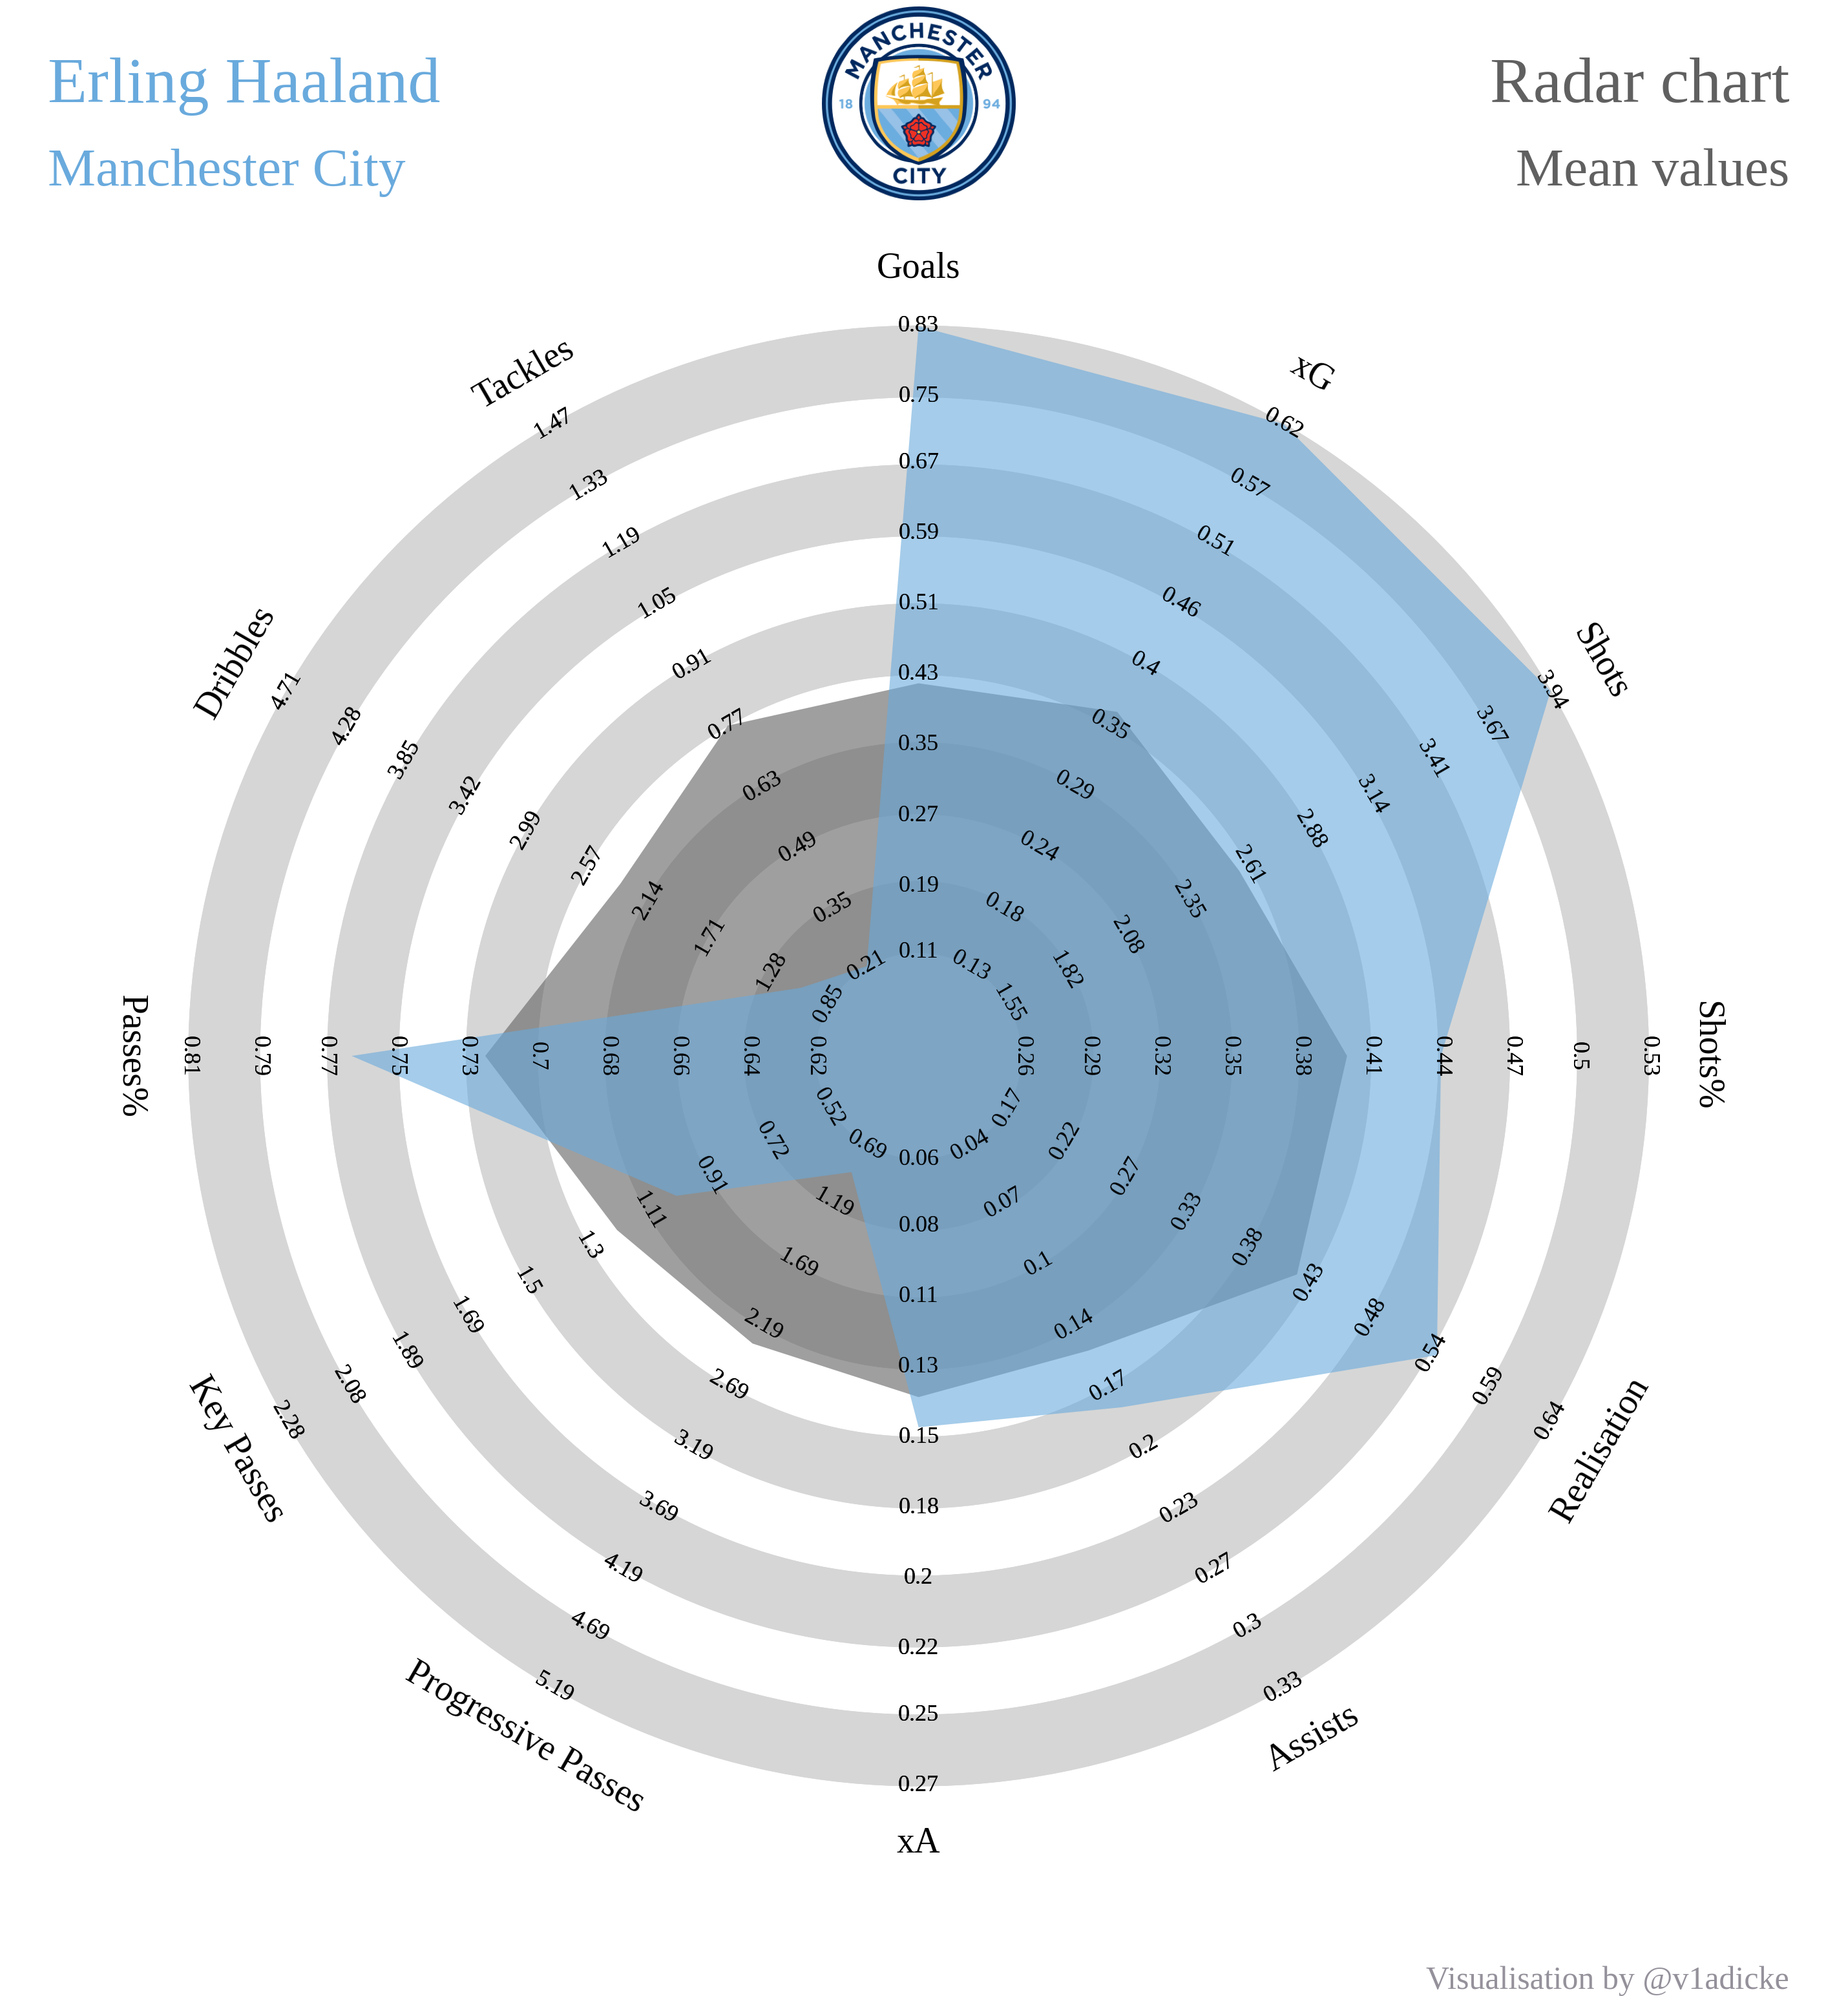

In [102]:
radar('Erling Haaland', 'Manchester City', 'FW')